Brian Blaylock  
October 5, 2018

# HRRR Time-lagged Ensembles

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553103/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon
from BB_maps.my_basemap import draw_HRRR_map

In [4]:
m = draw_HRRR_map()
lat, lon = get_hrrr_latlon(DICT=False)


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
validDATE = datetime(2018, 10, 4, 4)
variable = 'TMP:2 m'
sVAR = variable.replace(':', '-').replace(' ', '-')

HH = np.array([get_hrrr_variable(validDATE - timedelta(hours=f), variable, verbose=False)['value'] for f in range(19)])

if variable.split(':')[0] in ['TMP', 'DPT']:
    HH -= 273.15

In [56]:
forecasts = {0:{'name':'F02 through F05',
                'data':HH[2:6]},
             1:{'name':'F06 through F12',
                'data':HH[6:13]},
             2:{'name':'F12 through F18',
                'data':HH[12:]},
             3:{'name':'F06 through F18',
                'data':HH[6:]},
            }

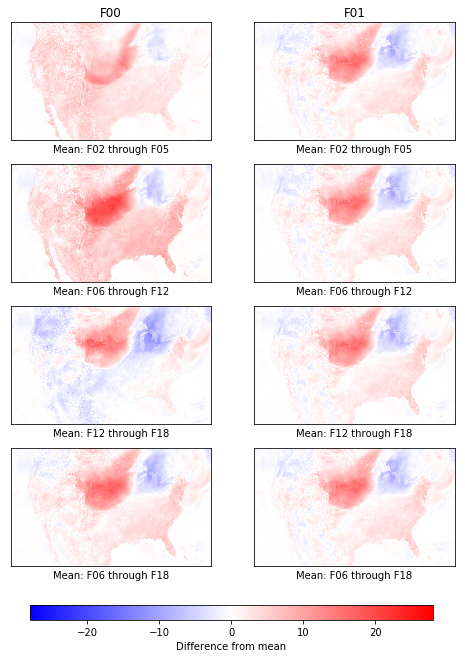

In [59]:
fig, axes = plt.subplots(4,2, figsize=[8,10])

vmax = np.maximum(np.abs((HH[1:] - HH[0]).max()), np.abs((HH[1:] - HH[0]).min()))
vmin = -vmax

for i in range(len(forecasts)):
    TLE_mean = np.mean(forecasts[i]['data'], axis=0)
    plt.sca(axes[:,[0]][i][0])
    m.pcolormesh(lon, lat, TLE_mean-HH[0], latlon=True, vmax=vmax, vmin=vmin, cmap='bwr')
    plt.xlabel('Mean: %s' % forecasts[i]['name'])

for i in range(len(forecasts)):
    TLE_mean = np.mean(forecasts[i]['data'], axis=0)
    plt.sca(axes[:,[1]][i][0])
    mesh = m.pcolormesh(lon, lat, np.mean(TLE, axis=0)-HH[1], latlon=True, vmax=vmax, vmin=vmin, cmap='bwr')
    plt.xlabel('Mean: %s' % forecasts[i]['name'])

#fig.subplots_adjust(bottom=0.8)
cbar_ax = fig.add_axes([0.16, 0.05, 0.7, 0.02]) # [left, bottom, width, height]
cb = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
cb.ax.set_xlabel(r'Difference from mean');

axes[0][0].set_title('F00');
axes[0][1].set_title('F01');